# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [3]:
#подгрузили данные в Dataframe
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# вывод информации о датафрейме
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Предобработка данных

**Все колонки имеют тип object. Изменим тип некоторых колонок для удобства работы с таблицей.**

In [5]:
#подсчёт пропусков в столбцах
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Постороим общую гистрограмму**

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

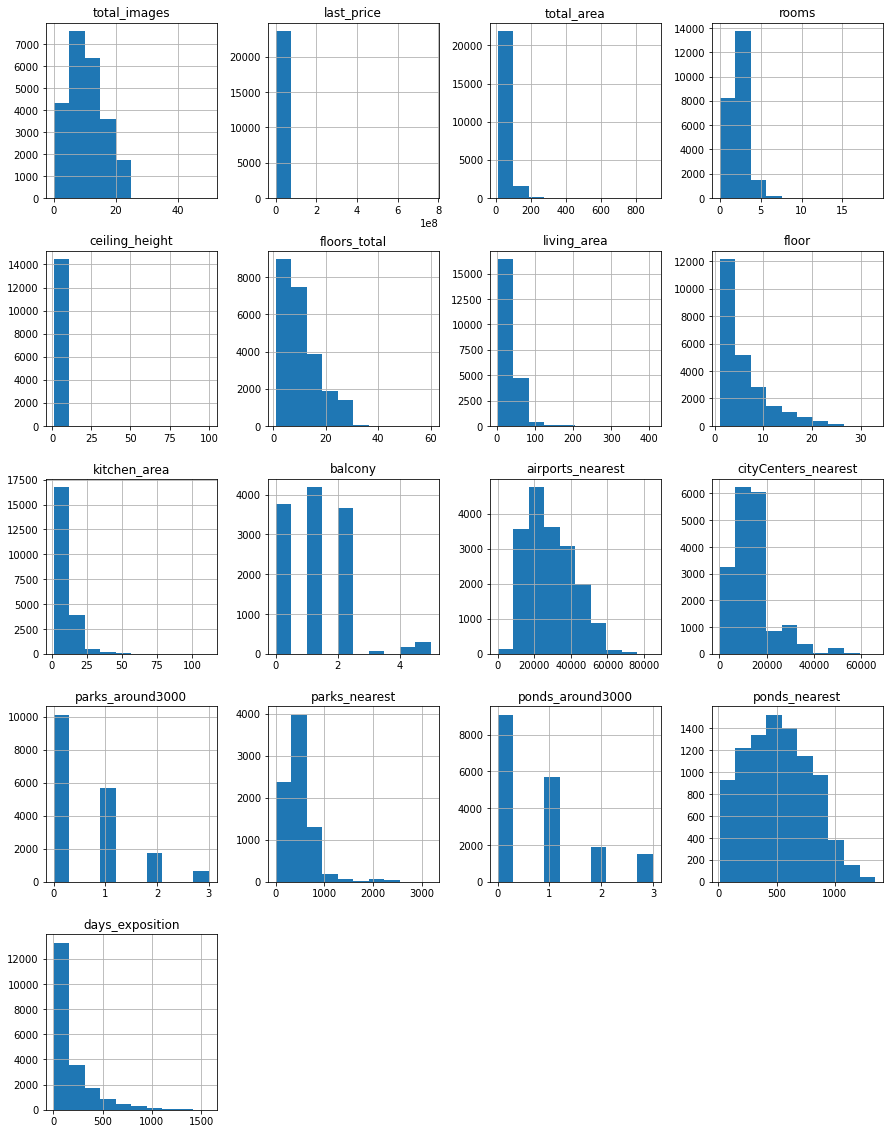

In [6]:
df.hist(figsize=(15, 20))

**Обнаружены пропуски в столбцах:**
* ceiling_height (высота потолков),
* floors_total (сколько всего этажей в доме),
* living_area (жилая площадь в квадратных метрах (м²)),
* kitchen_area (площадь кухни в квадратных метрах (м²)),
* balcony (наличие балкона),
* airports_nearest (расстояние до ближайшего аэропорта в метрах (м)), 
* cityCenters_nearest (расстояние до центра города (м)),
* parks_around3000 (число парков в радиусе 3 км),
* parks_nearest (расстояние до ближайшего парка (м)),
* ponds_around3000 (число водоёмов в радиусе 3 км,
* ponds_nearest (расстояние до ближайшего водоёма (м)),
* days_exposition (сколько дней было размещено объявление (от публикации до снятия))

**Начнём обработку со столбца, ceiling_height**

In [7]:
# Увеличим диапазон вывода значений на экран для просмотра значений на отклонения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df['ceiling_height'].value_counts()
df['ceiling_height'].isna().sum()

9195

**Пропущенные значения возникли, скорее всего из-за того что пользователи не заполнили графу с высотой потолков. Заменим пропуски на медианное значение, так как этот параметр, будет отражать высоту потолков для большинства квартир.**

In [8]:
df['ceiling_height'].median()

2.65

In [9]:
df['ceiling_height'].fillna(df['ceiling_height'].median(),inplace=True)

In [10]:
# проверка замены пропусков
df['ceiling_height'].isna().sum()


0

**Есть странные значения, например 32.00 метра. Скорее всего это ошибка ввода и настоящиая высота = 3.20.
Заменим выбивающиеся значения на правдопобные. Значение, которые выбиваются из вероятных показателей, например высота потолков выше 10м и ниже 2м, скорее всего ошибочно записаны, поэтома переведены либо в наиболее вероятные значения, либо в наиболее правдоподобные из распространённых.**

In [11]:
# заменяем ошибочные и аномальные значения
        
df.loc[df['ceiling_height']>= 10, 'ceiling_height'] =  df.loc[df['ceiling_height']>= 10, 'ceiling_height']/10

#проверка замены
df['ceiling_height'].value_counts()

2.65     9871
2.50     3522
2.60     1647
2.70     1582
3.00     1112
2.80      993
2.55      980
2.75      911
3.20      279
3.10      203
2.90      164
3.30      141
2.56      139
3.50      130
2.57      103
2.85      101
3.40       92
2.54       83
2.64       81
2.52       79
2.53       67
2.58       63
2.77       61
2.76       60
3.15       57
2.78       51
2.95       47
3.05       46
4.00       39
3.25       36
3.60       36
2.67       36
2.73       35
2.51       34
2.72       31
3.70       30
2.74       28
2.40       24
2.68       23
3.80       20
2.84       19
2.82       18
3.55       18
3.12       17
2.66       17
3.35       16
2.83       15
2.45       15
3.08       14
2.62       14
3.90       14
2.59       14
2.71       13
2.63       13
2.00       12
2.88       12
3.06       11
3.13       11
3.18       11
3.07       11
3.33       10
4.20       10
2.79       10
2.87       10
2.81        9
3.45        9
2.92        9
3.75        8
2.48        8
3.95        8
3.38        8
3.02  

**Удалим редкие и выбивающиеся значения**

<AxesSubplot:>

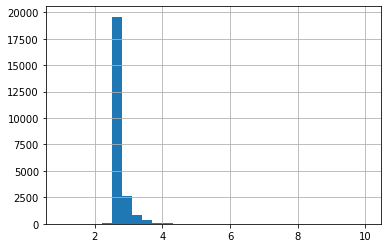

In [12]:
df['ceiling_height'].hist(bins=30)

In [13]:
df = df.query('ceiling_height > 2')

**Далее проверим колоноку floors_total**

In [14]:
# выводим занчения на экран
df['floors_total'].value_counts()

5.0     5783
9.0     3760
16.0    1375
12.0    1360
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     831
3.0      668
7.0      592
14.0     552
18.0     504
24.0     469
8.0      390
2.0      381
15.0     364
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
52.0       1
34.0       1
33.0       1
Name: floors_total, dtype: int64

**Аномальных значений не видно, посмотрим на гистограмму**

<AxesSubplot:>

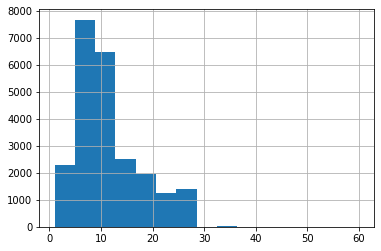

In [15]:
df['floors_total'].hist(bins=15)

**Большинство домов имеют этажность от 5 до 12 этажей**
**Пропусков немного, поэтому удалим пропущенные значения** 

In [16]:
#удаляем пропущенные значения
df = df.dropna(subset=['floors_total'])
df['floors_total'].isna().sum()

0

<AxesSubplot:>

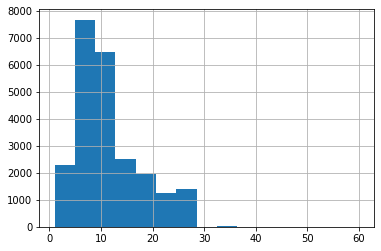

In [17]:
# посмтроим гистограмму и проверим как повлияло удаление пропусков на распределение
df['floors_total'].hist(bins=15)

**Разница не заметна, осавим как есть**

**Есть редкие значения больше 30, удалим редкие значения**

**Меняем тип данных на int, м.к. дробной этажности на бывает**

In [18]:
# удаляем редкие значения
df = df.query('floors_total < 30.0')

In [19]:
# заменяем значения на тип int
df['floors_total'] = df['floors_total'].astype('int')

# проверим, получилась ли замена
df['floors_total'].dtypes

dtype('int64')

**Далее разберём столбец living_area**

In [20]:
# выводим сгруппированные значения следующего столбца 'living_area' на экран
df['living_area'].value_counts()

18.000000     881
17.000000     674
30.000000     598
16.000000     483
20.000000     480
28.000000     421
31.000000     378
19.000000     326
32.000000     318
29.000000     318
15.000000     311
27.000000     309
43.000000     231
40.000000     222
42.000000     217
33.000000     214
35.000000     194
34.000000     187
39.000000     185
36.000000     170
44.000000     169
17.500000     168
38.000000     159
45.000000     148
37.000000     140
47.000000     137
21.000000     136
48.000000     133
41.000000     132
50.000000     126
26.000000     121
14.000000     116
46.000000     111
25.000000     108
18.500000     105
17.800000     101
49.000000     100
17.600000      96
22.000000      96
17.700000      96
18.600000      94
16.500000      91
17.400000      90
17.200000      87
54.000000      81
52.000000      81
53.000000      79
15.500000      76
56.000000      73
17.100000      73
60.000000      72
17.300000      72
18.200000      70
29.500000      70
18.300000      70
24.000000 

In [21]:
# округлим данные до двух токе после запятой для удобства чтения, на точности данных это не отразится
df['living_area'] = round(df['living_area'], 2)
df['living_area'].value_counts()

18.00     881
17.00     674
30.00     598
16.00     483
20.00     480
28.00     421
31.00     378
19.00     326
32.00     318
29.00     318
15.00     311
27.00     309
43.00     231
40.00     222
42.00     217
33.00     214
35.00     194
34.00     187
39.00     185
44.00     170
36.00     170
17.50     168
38.00     159
45.00     148
37.00     140
47.00     137
21.00     136
48.00     134
41.00     132
50.00     126
26.00     121
14.00     116
46.00     111
25.00     108
18.50     105
17.80     101
49.00     100
22.00      96
17.70      96
17.60      96
18.60      94
16.50      91
17.40      90
17.20      87
54.00      81
52.00      81
53.00      79
15.50      76
56.00      73
17.10      73
60.00      72
17.30      72
18.30      70
29.50      70
18.20      70
24.00      69
29.70      67
51.00      67
30.50      66
27.50      65
27.40      65
16.40      64
55.00      63
20.10      63
17.90      61
18.10      60
18.70      59
28.50      57
15.60      57
15.40      57
31.50      55
23.00 

**Построим гистрограмму**

<AxesSubplot:>

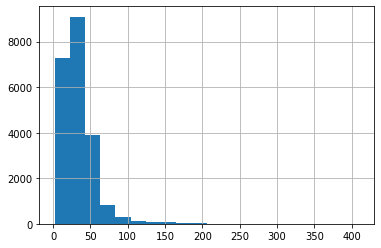

In [22]:
df['living_area'].hist(bins=20)

In [23]:
#проверим количество пропущенных значений столбца
df['living_area'].isna().sum()

1867

**Довольно много пропоущенных значений 8% от всех значений. Вероятно пользователи не указали площаль кваритры, либо значения пропали в результате сбоя в программе**
**Заменим пропущенные значения на медианные и проверим влияние на результат.**
**Есть очень редкие значения выше 125м2, удалим редкие значения**

In [24]:
# Меняем пропущенные значения на мединные
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

<AxesSubplot:>

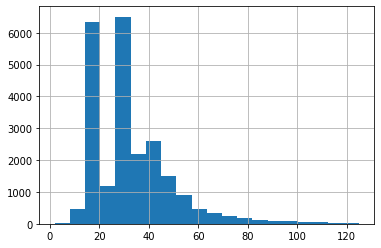

In [25]:
# удаляем редкие значения
df = df.query('living_area < 125.0')



df['living_area'].hist(bins=20)

**Следующий столбец для обработки: kitchen_area**

In [26]:
# выведем сгруппированные значение столбца 'kitchen_area'  на экран
df['kitchen_area'].value_counts()

6.00      1297
10.00     1257
8.00      1110
9.00      1100
7.00      1061
11.00      795
12.00      653
8.50       414
5.50       400
14.00      378
5.00       358
15.00      343
13.00      318
6.30       296
6.20       282
8.30       272
6.50       262
8.20       235
7.50       232
8.40       214
9.50       180
16.00      174
10.30      171
7.20       168
10.80      163
10.20      161
7.10       158
10.50      154
8.10       153
8.60       151
8.70       150
10.70      146
5.30       139
5.60       138
5.40       136
10.60      131
20.00      127
10.40      126
11.50      125
9.30       120
5.20       117
9.40       114
17.00      113
6.10       111
8.80       110
10.10      110
7.80       105
9.80       105
9.60       104
12.50      104
9.20       102
7.30        99
18.00       98
6.40        95
7.40        91
6.70        91
5.80        86
6.60        84
11.30       84
6.80        83
5.70        81
7.70        80
9.10        80
11.20       77
9.70        74
11.40       74
6.90      

**Построим гистрограмму**

<AxesSubplot:>

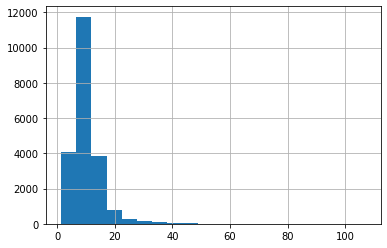

In [27]:
df['kitchen_area'].hist(bins=20)

**Ситуация как и в предыдущих столбцах, большая часть значений в начале диапазона. Есть аномальные значения, но неизвестно, ошибка ли это. Проврим количество пропусков, и сможем ли их заменить**


In [28]:
# проверка на пропуски 
df['kitchen_area'].isna().sum()

2213

**Заменим пропуски на медианное значение**

In [29]:
# вводим переменную для изменённого столбца
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

# проверка наличия пропусков
df['kitchen_area'].isna().sum()

0

**Есть редкие значения выше 33м2, удалим редкие и значения**

In [30]:
# удаление редких значений
df = df.query('kitchen_area < 33.0')

<AxesSubplot:>

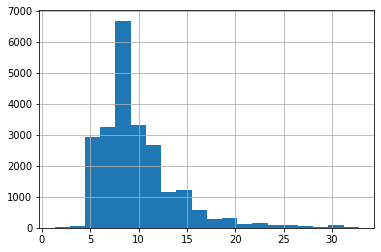

In [31]:

# построим гистрограмму с медианными значениями
df['kitchen_area'].hist(bins=20)

**Следующий столбец для изучения 'balcony'**

In [32]:
# выведем сгруппированные значения столбца 'balcony' на экран
df['balcony'].value_counts()

1.0    4115
0.0    3637
2.0    3617
5.0     296
4.0     178
3.0      73
Name: balcony, dtype: int64

In [33]:
#проверим наличие пропусков
df['balcony'].isna().sum()

11225

**Довольно много пропущенных значений, в данном случае, наболее вероятно что пропущенные значенмя означают что балкона нет, поэтому замени пропуски на "0"**
**Заменим тип данных на int, т.к. нули после запятой не нужны, вряд ли существут дробное количество балконов**
**Построим гистрограмму для показа распределения наглядно** 

<AxesSubplot:>

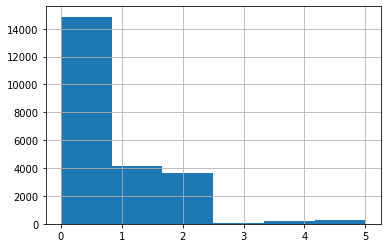

In [34]:
# заменяем пропуски на "0"
df['balcony'] = df['balcony'].fillna(0)

# меням тим данных на 'int'
df['balcony'] = df['balcony'].astype('int')

# выводим гистрограмму
df['balcony'].hist(bins=6)

**Из гистограммы видно, что большинство кваритр балконов не имеют**

**Следующий столбец: 'airports_nearest'** 

In [35]:
# выводим значение сгруппированные значения столбца 'airports_nearest'
df['airports_nearest'].value_counts()

37434.0    58
21928.0    32
44870.0    30
39946.0    28
37407.0    27
39140.0    26
19499.0    23
21793.0    23
31744.0    23
37412.0    22
30073.0    21
21460.0    21
44382.0    21
13461.0    21
51333.0    20
23639.0    20
11405.0    18
43074.0    18
39393.0    18
23604.0    18
48847.0    18
39141.0    18
12678.0    17
27102.0    17
23609.0    17
18748.0    16
13931.0    16
34967.0    16
23617.0    16
17720.0    16
22089.0    15
35129.0    15
37625.0    15
52726.0    15
22077.0    15
53115.0    15
52480.0    15
9354.0     15
20028.0    15
28554.0    15
52212.0    14
47303.0    14
7026.0     14
46530.0    14
36410.0    14
32158.0    14
35257.0    14
10663.0    13
32746.0    13
18995.0    13
37948.0    13
36533.0    13
35847.0    13
14184.0    13
13908.0    13
27314.0    13
35966.0    13
23756.0    13
33564.0    12
30894.0    12
43157.0    12
17950.0    12
43642.0    12
14768.0    12
18867.0    12
21743.0    12
18012.0    12
33977.0    12
16087.0    12
53148.0    12
34201.0    12
7659.0

In [36]:
# проверка на наличие пропусков
df['airports_nearest'].isna().sum()

5508

<AxesSubplot:>

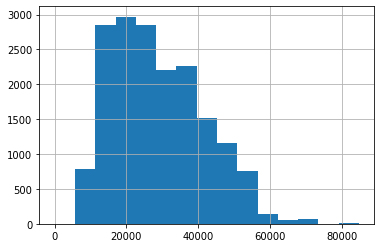

In [37]:
# выведем гистрограмму
df['airports_nearest'].hist(bins=15)

In [38]:
# существуют крайние значения, поэтому медианные значения будет более правдоподобны
df['airports_nearest'].median()

26842.0

<AxesSubplot:>

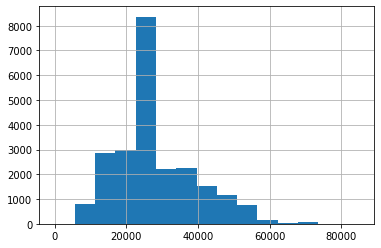

In [39]:
#построим гистрограмму и проверим влияние пропущенных значений на данные
airports_nearest_median = df['airports_nearest'].fillna(df['airports_nearest'].median())
airports_nearest_median.hist(bins=15)

**Влияние пропущенных значений слишком велико, поэтому остаивим пропущенные значения**

<AxesSubplot:>

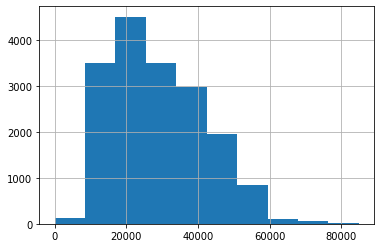

In [40]:
# строим гистрограмму для проверки
df['airports_nearest'].hist(bins=10)

**Переведём расстоние из метров в километры и тип данных из float в int**

In [41]:
df['airports_nearest'] = df['airports_nearest']/1000
df['airports_nearest'] = df['airports_nearest'].astype('int', errors = 'ignore')

df['airports_nearest']

0        18.863
1        12.817
2        21.741
3        28.098
5           NaN
6        52.996
7        23.982
8           NaN
9        50.898
10       38.357
11       48.252
12          NaN
13       37.868
14       20.782
15       12.900
16       22.108
17       33.564
18       44.060
19       38.900
20       53.134
21       36.064
22          NaN
23       15.414
24       20.052
25       34.967
26       11.580
27       29.197
28       18.557
29       30.394
30          NaN
31       32.888
32       11.349
33       26.535
34       13.943
35       23.670
36       49.574
37          NaN
38          NaN
39       13.413
40       52.996
41       37.715
42       35.416
43       15.016
44       30.471
45       30.011
46       15.114
47          NaN
48       21.460
49       45.341
50       19.841
52       16.510
53       52.611
54       33.331
55       10.643
56       13.772
57       13.097
58       12.988
59       11.125
60          NaN
61       22.568
62          NaN
63       26.055
64      

**Следующий столбец 'cityCenters_nearest'**

In [42]:
# вывод отсортированного столбца 'cityCenters_nearest'
df['cityCenters_nearest'].value_counts()

8460.0     58
20802.0    32
10720.0    28
8434.0     27
10364.0    26
8370.0     24
13845.0    23
4836.0     23
4844.0     22
16921.0    21
10337.0    21
17121.0    21
13056.0    21
15985.0    20
16788.0    20
14883.0    20
13222.0    20
14479.0    19
5294.0     19
17256.0    19
5164.0     18
16685.0    18
14772.0    18
12738.0    18
11096.0    18
7442.0     17
14153.0    17
16722.0    17
5223.0     17
19247.0    17
18465.0    17
4341.0     16
16293.0    16
19717.0    16
14640.0    16
5299.0     16
11004.0    16
17405.0    15
14769.0    15
16005.0    15
4087.0     15
15945.0    15
13149.0    15
12398.0    15
18900.0    15
19292.0    15
13242.0    14
15853.0    14
5038.0     14
17501.0    14
16002.0    14
34341.0    14
12099.0    14
16802.0    14
13265.0    14
17071.0    14
10647.0    14
4358.0     13
15076.0    13
21740.0    13
14528.0    13
5384.0     13
4870.0     13
11920.0    13
9289.0     13
19242.0    13
17417.0    13
19694.0    13
14657.0    13
7348.0     13
15541.0    13
13073.

<AxesSubplot:>

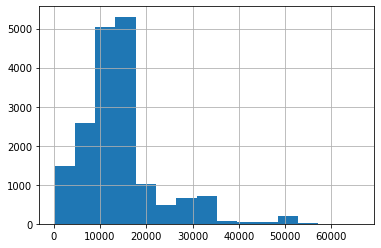

In [43]:
# постройка гистограммы
df['cityCenters_nearest'].hist(bins=15)

In [44]:
#проверка наличия пропущенных значений
df['cityCenters_nearest'].isna().sum()

5488

**Довольно много пропусков, проверим влияние замены пропусков на данные**

In [45]:
# из-за разроса в данных меняеть проуски следует на медиану
cityCenters_nearest_median = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())

In [46]:
cityCenters_nearest_median.isna().sum()

0

<AxesSubplot:>

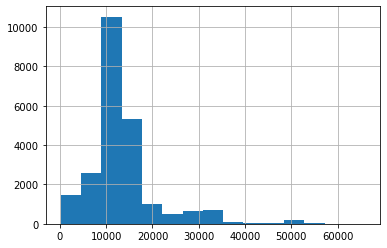

In [47]:
cityCenters_nearest_median.hist(bins=15)

**Оставим изменения**

In [48]:
df['cityCenters_nearest'] = cityCenters_nearest_median

**Переведём значения из метров в километры для удобства расчётов и наглядности. И переведём тип данных из float в int, т.к. значения после запятой нам не нужны**

**Так же удалим редкие значения выше 38км**

<AxesSubplot:>

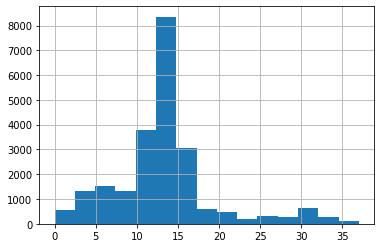

In [49]:
# перевод из метров в километры
df['cityCenters_nearest'] = df['cityCenters_nearest']/1000
# перевод из float в int
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int', errors = 'ignore')

# удаление редких значений
df = df.query('cityCenters_nearest < 38')

# строим гистограмму для проверки
df['cityCenters_nearest'].hist(bins=15)


**Следующий столбец 'parks_around3000'**

In [50]:
# вывод отсортированных значений столбца 'parks_around3000'
df['parks_around3000'].value_counts()

0.0    9714
1.0    5472
2.0    1612
3.0     546
Name: parks_around3000, dtype: int64

In [51]:
# проверка на пропущенные значения
df['parks_around3000'].isna().sum()

5487

**Много пропусков, отавим их удаление может сильно повлиять на выводы**

<AxesSubplot:>

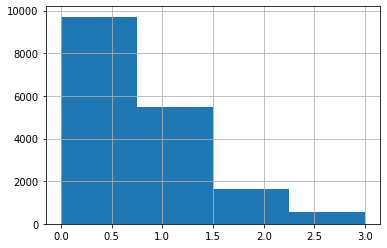

In [52]:
# переведём значения из float в int, т.к. значений после точки нет
df['parks_around3000'] = df['parks_around3000'].astype('int', errors = 'ignore')

# постройка гистрограммы для столбца
df['parks_around3000'].hist(bins=4)

**Следующий столбец 'parks_nearest**

In [53]:
# вывод отсортированных значений столбца 'parks_nearest'
print(df['parks_nearest'].value_counts().head(20))

441.0     64
456.0     40
392.0     38
173.0     37
471.0     30
2102.0    28
541.0     28
485.0     27
458.0     27
447.0     27
630.0     26
288.0     26
367.0     25
679.0     25
398.0     24
537.0     24
164.0     24
401.0     24
223.0     24
350.0     23
Name: parks_nearest, dtype: int64


**Пропущенные значений скорее всего вызваны тем, что нет парков по близости. Пропущенных значений довольно много удаление повлияет на распределение. Заменим значения на 0, что будет означать пропуск**
**Переведём тип значений из float в int, т.к. не нужны значения после точки**
**Есть нереалистичные значения меньше 10м. удалим эти значения. И выведем гистрограмму столбца**

AxesSubplot(0.125,0.125;0.775x0.755)


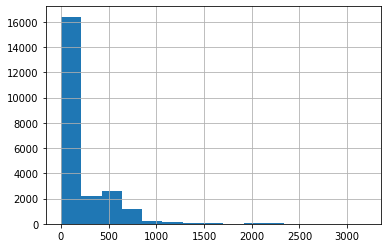

In [54]:
#удалим значения меньше 0 
df = df.drop(df[df['parks_nearest'] < 10.0].index)

# пропущенные значения
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['parks_nearest'].isna().sum()

# перевод типа значений
df['parks_nearest'] = df['parks_nearest'].astype(int)

# постройка гистрограммы
print(df['parks_nearest'].hist(bins=15))
 

**Есть редкие значения выше 1100м, удалим редкие значения**

AxesSubplot(0.125,0.125;0.775x0.755)


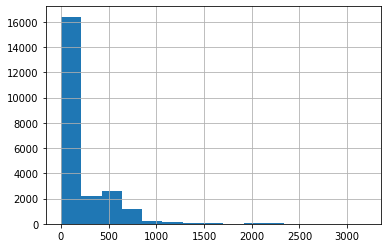

In [55]:
#постройка гистрограммы для проверки
print(df['parks_nearest'].hist(bins=15))

**Следующий столбец 'ponds_around3000'**

In [56]:
# вывод отсортированных значений
print(df['ponds_around3000'].value_counts())

0.0    8775
1.0    5478
2.0    1754
3.0    1333
Name: ponds_around3000, dtype: int64


In [57]:
# проверка на наличие пропусков
print(df['ponds_around3000'].isna().sum())

5487


**Пропуски отсутсвут, смени тип данных с float на int, т.к. значения не могут быть дробными** 

AxesSubplot(0.125,0.125;0.775x0.755)


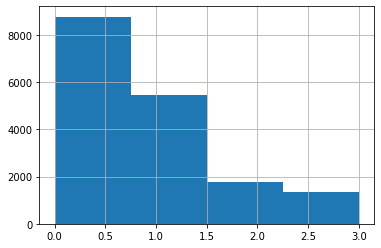

In [58]:
# перевод типа значения c float на int
df['ponds_around3000'] = df['ponds_around3000'].astype('int', errors = 'ignore')
# построим гистограмму
print(df['ponds_around3000'].hist(bins=4))

**Следующий столбец 'ponds_nearest'**

In [59]:
# выводи сгруппированные данные
print(df['ponds_nearest'].value_counts())

427.0     66
454.0     39
564.0     37
474.0     37
153.0     36
303.0     34
433.0     33
440.0     31
400.0     30
733.0     30
359.0     29
196.0     28
756.0     27
755.0     27
136.0     27
330.0     26
274.0     26
351.0     25
792.0     25
399.0     25
623.0     25
503.0     25
429.0     25
865.0     25
434.0     24
407.0     24
516.0     24
372.0     24
471.0     23
170.0     23
473.0     23
982.0     23
582.0     23
935.0     23
712.0     23
593.0     22
579.0     22
287.0     22
132.0     22
439.0     22
232.0     22
657.0     22
31.0      22
466.0     22
485.0     22
896.0     21
651.0     21
930.0     21
534.0     21
654.0     21
874.0     21
145.0     21
802.0     21
522.0     21
665.0     20
162.0     20
649.0     20
390.0     20
527.0     20
825.0     20
246.0     20
830.0     20
859.0     19
557.0     19
478.0     19
611.0     19
412.0     19
575.0     19
776.0     19
690.0     19
333.0     19
606.0     19
398.0     19
263.0     18
177.0     18
502.0     18
151.0     18

In [60]:
# проверка на пропущенные значения
print(df['ponds_nearest'].isna().sum())

14262


**Пропущенных значений много, либо пользователь не заполнил значение, либо пруда рядом нет**
**Заменим пропущенные значения на "0"**
**Поменяем тип данных c float на int**
**Посмотрим гистрограмму**

AxesSubplot(0.125,0.125;0.775x0.755)


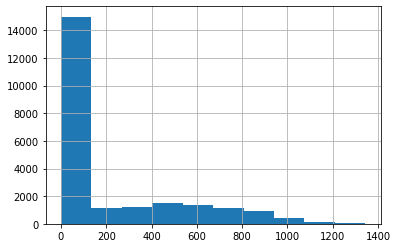

In [61]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
print(df['ponds_nearest'].hist(bins=10))

**Есть редкие значения больше 1200**

AxesSubplot(0.125,0.125;0.775x0.755)


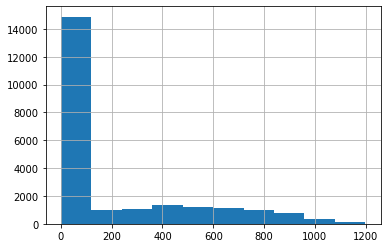

In [62]:
#удаление редких значений**
df = df.query('ponds_nearest < 1200')
#постройка гистограммы для проверки
print(df['ponds_nearest'].hist(bins=10))

**Расстояние до парков распределяется равномерно.**
**Следующий столбец 'days_exposition'**

In [63]:
# выводим сгруппированные данные
print(df['days_exposition'].value_counts())

45.0      860
60.0      530
7.0       227
30.0      206
90.0      185
4.0       175
3.0       151
5.0       150
14.0      142
9.0       137
20.0      137
44.0      136
8.0       134
11.0      132
10.0      126
13.0      125
18.0      124
15.0      122
22.0      121
6.0       121
19.0      121
28.0      120
21.0      120
29.0      116
17.0      115
35.0      114
34.0      113
24.0      113
54.0      108
12.0      107
42.0      107
59.0      106
43.0      105
61.0      105
27.0      104
23.0      104
74.0      102
26.0      101
16.0       99
89.0       98
63.0       96
37.0       94
67.0       91
40.0       89
46.0       88
64.0       87
36.0       85
32.0       84
56.0       84
52.0       82
33.0       82
25.0       80
92.0       80
39.0       79
38.0       78
48.0       77
47.0       76
41.0       75
55.0       74
70.0       74
84.0       74
65.0       74
53.0       74
57.0       72
113.0      71
68.0       71
66.0       70
62.0       70
91.0       69
85.0       69
58.0       69
71.0  

In [64]:
# проверка на налиие пропусков
print(df['days_exposition'].isna().sum())

3006


**Не ясно с чем могут быть связаны пропуски**
**Разброс данных большой поэтому для замены лучше взять медианное значеие**

In [65]:
# замена пропусков на медианное значение
print(df['days_exposition'].median())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
print(df['days_exposition'].isna().sum())

94.0
0


**Замени тип данных на int, данные не имеют дробной части**
**Выведем гистограмму для наглядности распределения**

AxesSubplot(0.125,0.125;0.775x0.755)


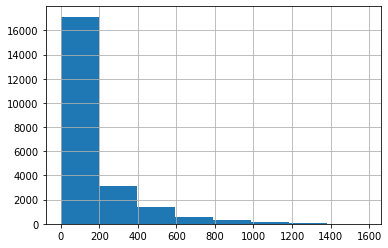

In [66]:
df['days_exposition'] = df['days_exposition'].astype('int')
print(df['days_exposition'].hist(bins=8))

**Удалим редкие значения выше 980**

AxesSubplot(0.125,0.125;0.775x0.755)


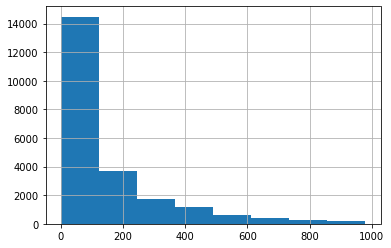

In [67]:
# удаление редких значений
df = df.query('days_exposition < 980')

# постройка гистрограммы для проверки
print(df['days_exposition'].hist(bins=8))

**Большинство картир продаётся в первые 150дней**
**Следующий столбец 'locality_name'**

In [68]:
# вывод сгруппированных данных
print(df['locality_name'].value_counts())
df['locality_name'].shape

Санкт-Петербург                                            14971
посёлок Мурино                                               514
посёлок Шушары                                               433
Всеволожск                                                   392
Пушкин                                                       352
Колпино                                                      335
посёлок Парголово                                            326
Гатчина                                                      303
деревня Кудрово                                              293
Выборг                                                       233
Сестрорецк                                                   177
Кудрово                                                      168
Красное Село                                                 166
Петергоф                                                     143
деревня Новое Девяткино                                      141
Сертолово                

(22504,)

In [69]:
# проверка на наличие пропусков
df['locality_name'].isna().sum()

47

In [70]:
# удаление пустых строк
df = df.dropna(subset=['locality_name'])

# проверка на наличие пропусков
df['locality_name'].isna().sum()

0

**Обнаружены пустые строки и дубликат, удалим пустые строки и обработаем дубликат**

In [71]:
# удаление пустых строк
df = df.dropna(subset=['locality_name'])

print(df['locality_name'].value_counts())
df['locality_name'].shape

Санкт-Петербург                                            14971
посёлок Мурино                                               514
посёлок Шушары                                               433
Всеволожск                                                   392
Пушкин                                                       352
Колпино                                                      335
посёлок Парголово                                            326
Гатчина                                                      303
деревня Кудрово                                              293
Выборг                                                       233
Сестрорецк                                                   177
Кудрово                                                      168
Красное Село                                                 166
Петергоф                                                     143
деревня Новое Девяткино                                      141
Сертолово                

(22457,)

**Проверка методами unique() и nunique()**

In [72]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Сертолово', 'Петергоф',
       'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Слан

In [73]:
df['locality_name'].nunique()

359

**Уберём тип населённого пункта, так дубликаты будут заметнее**

In [74]:
# удаление части строки 
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'посёлок ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'поселок ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'село ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'деревня ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'городской посёлок ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'посёлок городского типа ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'городского типа ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'городской ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'садоводческое некоммерческое товарищество ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'садовое товарищество ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'при железнодорожной станции ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'станции ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'коттеджный ',value=r'')
df['locality_name'].replace(regex=True,inplace=True,to_replace=r'форт',value=r'')
#df['locality_name'].replace(regex=True,inplace=True,to_replace=r'станции ',value=r'')
#df['locality_name'].replace(regex=True,inplace=True,to_replace=r'станции ',value=r'')



In [75]:
# проверка уникальных значений
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кировск', 'Новое Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая Ропша',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Лопухинка',
       'Пикалёво', 'Терволово', 'Советский', 'По

In [76]:
# проверка количества уникальных значений
df['locality_name'].nunique()

300

**До перехода на следущий этап нужно добавить новые столбцы**
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [77]:
# добавим столбец с ценой за один квадратный метр
df['price_per_metre'] = df['last_price'] / df['total_area']
df['price_per_metre'] = df['price_per_metre'].round(decimals=2)
# вывод для проверки
print(df['price_per_metre'].head())

0    120370.37
1     82920.79
2     92785.71
3    408176.10
5     95065.79
Name: price_per_metre, dtype: float64


In [78]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [79]:
# создаём столбец дня недели публикаци
df['day_exposition'] = df['first_day_exposition'].dt.weekday

# вывод для проверки
print(sorted(df['day_exposition'].unique()))


[0, 1, 2, 3, 4, 5, 6]


In [80]:
# создаём столбец месяца публикаци
df['month_exposition'] = df['first_day_exposition'].dt.month

# вывод для проверки
print(sorted(df['month_exposition'].unique()))


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [81]:
# создаём столбец год публикации объявления
df['year_exposition'] = df['first_day_exposition'].dt.year

# вывод для проверки
print(sorted(df['year_exposition'].unique()))


[2014, 2015, 2016, 2017, 2018, 2019]


In [82]:
# создание столбца типа этажа
df.loc[df['floor']==1, 'floor_type'] = "первый"
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = "последний"
df['floor_type'] = df['floor_type'].fillna("другой")

#вывод для проверки
df['floor_type'].value_counts().head(15)

другой       16562
последний     3146
первый        2749
Name: floor_type, dtype: int64

**Изначально данные подготовлены плохо. Много пропусков, столбы не разделены. Пришлось затратить много времени на подготовку данных.**


**На этом предобработка данных закончена**

### Проведите исследовательский анализ данных

**Изучим столбец общая площадь 'total_area'**

count    22457.000000
mean        57.707538
std         27.170888
min         12.000000
25%         40.000000
50%         51.080000
75%         68.000000
max        500.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


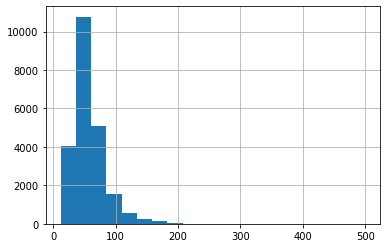

In [83]:
# разброс значений
print(df['total_area'].describe())

# постройка гистрограммы столбца
print(df['total_area'].hist(bins=20))

**Большинство кватир имеет площать около 50 м2, далее площадь резко снижается. Основаная масса всех кваритир находится в диапазоне от 42 м2 75 м2до**

**Следующий параметр: жилая площадь, 'living_area'**

count    22457.000000
mean        32.682741
std         16.151270
min          2.000000
25%         19.000000
50%         30.000000
75%         40.400000
max        124.900000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


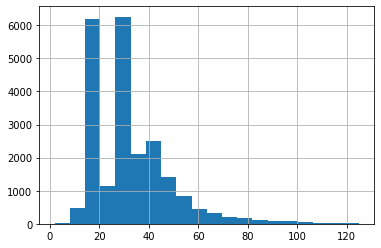

In [84]:
# разброс значений
print(df['living_area'].describe())

# постройка гистрограммы столбца
print(df['living_area'].hist(bins=20))

**Большая часть квартир имеет жилую площадь от 20м2 до 45м2, имеются пики с площадью около 20м2 и около 30м2**

**Следующий параметр: площадь кухни 'kitchen_area**          


count    22457.000000
mean         9.959432
std          4.003509
min          1.300000
25%          7.300000
50%          9.000000
75%         11.100000
max         32.700000
Name: kitchen_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


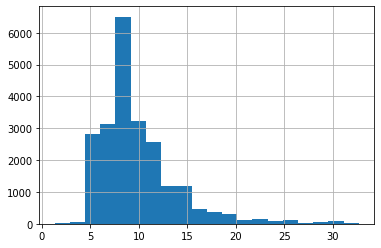

In [85]:
# разброс значений
print(df['kitchen_area'].describe())

# постройка гистрограммы столбца
print(df['kitchen_area'].hist(bins=20))

**Большинство кухонь укладываются в диапазон от 8м2 до 12м2, пик приходится на 10.5-11 м2, есть провал между 9м2 и 10м2**

**Следующий столбец цена объекта 'last_price'**  
  

count    2.245700e+04
mean     5.910187e+06
std      5.864444e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      2.892384e+08
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


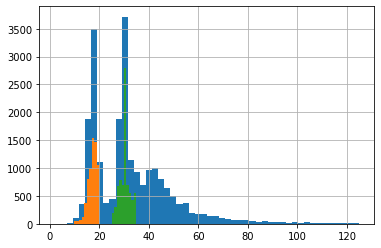

In [86]:
# разброс значений
print(df['last_price'].describe())


# постройка гистрограммы столбца
print(df['living_area'].hist(bins=50))

# сократим диапазон для наглядности
print(df['living_area'].hist(bins=10, range=(10,20)))
print(df['living_area'].hist(bins=10, range=(25,35)))

**Значительная часть сделок, более 10% происходит до 20млн. руб., точнее окоо 17,5, второй по значительности всплеск в районе 30млн.**

**Даллее исследуем столбец с количеством комнат**

count    22457.000000
mean         2.023244
std          0.989702
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


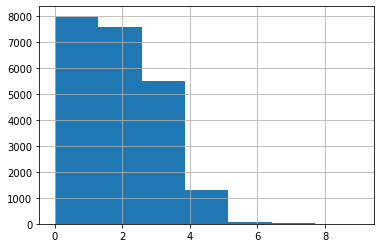

In [87]:
# разброс значений
print(df['rooms'].describe())


# постройка гистрограммы столбца
print(df['rooms'].hist(bins=7))

**75% предложений занимают квартиры от 1 до 3х комнат, квартиры с 1ой и 2мя комнатами представлены примерно одинаково около 35%, от них отстают трёхкомнатные квартиры около 25%, остльные представлены в оставшихся 5%  предложений**

**Следущий столбец для анализа высота потолков 'ceiling_height'**        

count    22457.000000
mean         2.691650
std          0.224388
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


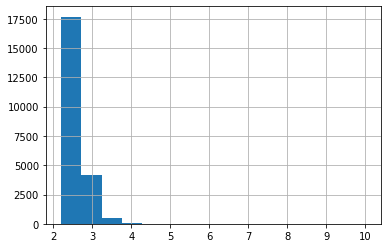

In [88]:
# разброс значений
print(df['ceiling_height'].describe())


# постройка гистрограммы столбца
print(df['ceiling_height'].hist(bins=15))

**Большая часть потолков высотой до 2,8м, в частности пики около 2,6м. Это 3/4 всех квартир. Меньше около 3х метров, остальное встречается значительно реже**

**Следующий столбец этаж квартиры 'floor'**     

count    22457.000000
mean         5.905686
std          4.870802
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


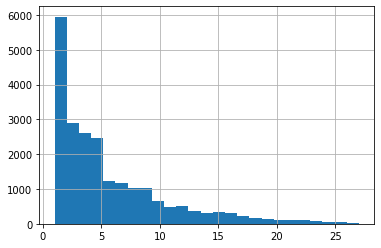

In [89]:
# разброс значений
print(df['floor'].describe())


# постройка гистрограммы столбца
print(df['floor'].hist(bins=25))

**Около половиы всех предложений - Квартиры до 5го этажа. Ещё треть - это от 5 до 10 этажей. На более высокие квартиры приходится всё остальное. Вероятно на рынке много малоэтажной застройки**

**Следующий столбец для анализа тип этажа квартиры («первый», «последний», «другой») floor_type**

другой       16562
последний     3146
первый        2749
Name: floor_type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


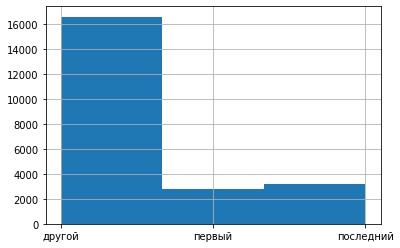

In [90]:
# разброс значений
print(df['floor_type'].value_counts())


# постройка гистрограммы столбца
print(df['floor_type'].hist(bins=3))

**Прмерно по 15% предложений - это первый этаж и последний этажи**

**Следующий столбец для анализа общее количество этажей в доме floors_total**

count    22457.000000
mean        10.756334
std          6.560109
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64
5     5447
9     3653
16    1337
12    1319
10    1126
4     1100
25    1058
17     814
6      813
3      609
14     542
7      528
18     493
24     456
2      364
15     355
8      354
23     335
19     333
22     279
20     260
13     212
11     188
27     162
21     150
26     124
1       24
28      21
29       1
Name: floors_total, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


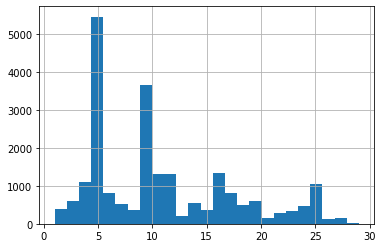

In [91]:
# разброс значений
print(df['floors_total'].describe())
print(df['floors_total'].value_counts())


# постройка гистрограммы столбца
print(df['floors_total'].hist(bins=25))

**Около половины занимают дома до 9ти этайжей включительно. Треть поровну делят 5ти и 9ти этажные дома, около 10% это дома в 16 и 17 этажей, так же небольшой пик в 5% это 25 этажей. Вероятно большую часть рынка это действительно старый фонд, т.к. большинство новостроек выше 12ти этажей** 

**Следйющий столбец расстояние до центра города 'cityCenters_nearest'** 

count    22457.000000
mean        13.166630
std          6.270277
min          0.000000
25%         11.000000
50%         13.000000
75%         15.000000
max         37.000000
Name: cityCenters_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


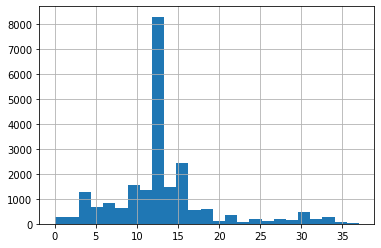

In [92]:
# разброс значений
print(df['cityCenters_nearest'].describe())



# постройка гистрограммы столбца
print(df['cityCenters_nearest'].hist(bins=25))

**Большая часть кваритра находится 11х до 15 километров от центра. заметнй пик приходтся на 12-13км, есть пики на 3-4км и на 16км**

**Следущий столбец для анализа: расстояние до ближайшего аэропорта airports_nearest**

count    17005.000000
mean        28.379151
std         12.230115
min          0.000000
25%         18.357000
50%         26.574000
75%         36.811000
max         61.748000
Name: airports_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


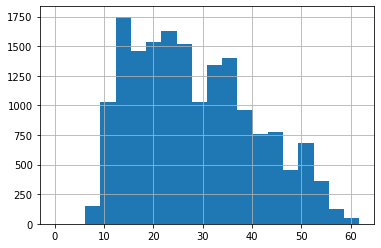

In [93]:
# разброс значений
print(df['airports_nearest'].describe())



# постройка гистрограммы столбца
print(df['airports_nearest'].hist(bins=20))

**до 9 км от аэропорта мало домов, резкий рост начинается с 9км со спадом до 30, потом пик от 30 до 35 км и снова спад. Похоже, что аэропорт распологается в 9км от города, и на расстроянии 30 км есть большой район** 

**Следующий столбец для просмотра расстояние до ближайшего парка parks_nearest**     

count    22457.000000
mean       164.382197
std        303.247187
min          0.000000
25%          0.000000
50%          0.000000
75%        293.000000
max       3190.000000
Name: parks_nearest, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


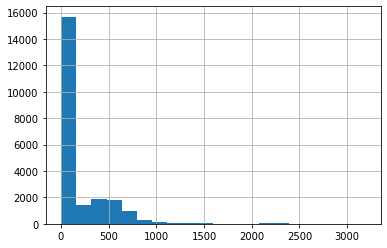

In [94]:
# разброс значений
print(df['parks_nearest'].describe())



# постройка гистрограммы столбца
print(df['parks_nearest'].hist(bins=20))

**Из графика заметно, что около 3/4 кваритир не имеют парков поблизости, остальные в основном распологаютс от 200 до 700 метров от парков**

**Следующий столбец для анализа день публикации объявления 'day_exposition'**

count    22457.000000
mean         2.570602
std          1.789665
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64
3    4049
1    3966
4    3811
2    3758
0    3423
5    1845
6    1605
Name: day_exposition, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


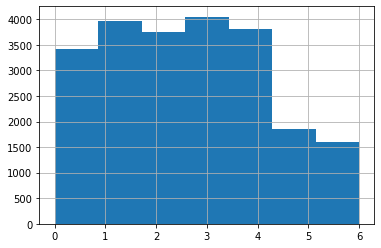

In [95]:
# разброс значений
print(df['day_exposition'].describe())
print(df['day_exposition'].value_counts())

# постройка гистрограммы столбца
print(df['day_exposition'].hist(bins=7))

**Заметно что объявления выставляются чаще в будние дни. В выходные выставлено только 970 объявлений, это около 14% от всех остальные. Т.е. активность в выходные дни, примерно  два раза ниже чем в будни. Самый "ленивый" день - это воскресенье. Дни наибольшей активности - это вторник и четверг**

**Следующий столбец для анализа это день и месяц публикации объявления 'month_exposition'**


count    22457.000000
mean         6.410741
std          3.488028
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64
2     2504
3     2432
11    2248
4     2236
10    2030
9     1884
8     1685
6     1675
7     1598
12    1547
1     1409
5     1209
Name: month_exposition, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


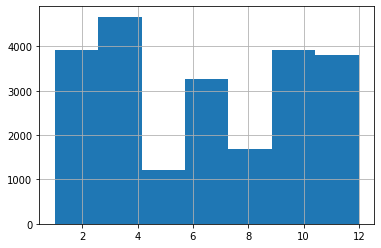

In [96]:
# разброс значений
print(df['month_exposition'].describe())
print(df['month_exposition'].value_counts())

# постройка гистрограммы столбца
print(df['month_exposition'].hist(bins=7))

**Летом - сезон отпусков. и объявлний меньше. Инетересно, что спад начинается с мая. Причём май наименее активный месяц, Наибольшая с оскени по весну. Месяцы наибольшей активности, по убыввающей: февраль, март, апрель.**

**Данные распределены в целом довольно равномерно и довольно ожидаемо. Удалось выяснит что больша часть продаж приходится на малоэтажные здания. Большая часть активности приходится на будни и осень-зиму=весну. Квартиры в среднем в 12 км от центра города и 30 км от аэропорта. Много квартир далеко от парков**

**Далее изучим как быстро продавались квартиры, рассмотрим столбец 'days_exposition'**

count    22457.000000
mean       155.357483
std        173.517866
min          1.000000
25%         45.000000
50%         94.000000
75%        189.000000
max        979.000000
Name: days_exposition, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


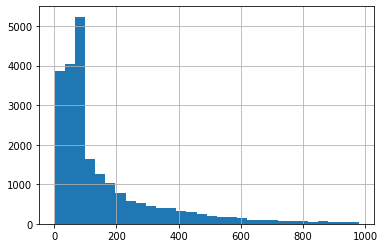

In [97]:
# разброс значений
print(df['days_exposition'].describe())

# постройка гистрограммы столбца
print(df['days_exposition'].hist(bins=30))

**Большинтво кваритра продаётся до 100 дней. на графике виден пик а районе 94 дней - это медианное значение которым заменили пропущенные значения. Среднее 155 дня. Самая быстрая продажа произошла за один день. Дольше всего продавалась квартира за 979 дней. Быстро продажей стоит считать продажу меьше 45 дней, долгой продажу дольше 189 дней. Необычно долгик продажи - продажи дольше 400дней**

**Настало время выяснить какие факторы больше всего влияют на общую (полную) стоимость объекта**

In [98]:
#сделаем сводную таблицу
df_pivot_total_area = df.pivot_table(index='total_area', values='last_price')
print(df_pivot_total_area.head(10)) 

            last_price
total_area            
12.0         2400000.0
13.0         2350000.0
13.2         1686000.0
14.0         1190000.0
15.0         1725000.0
15.5         2450000.0
16.0         2100000.0
17.0         1700000.0
17.2         2050000.0
17.6         3400000.0


AxesSubplot(0.125,0.125;0.775x0.755)


0.6991275836689379

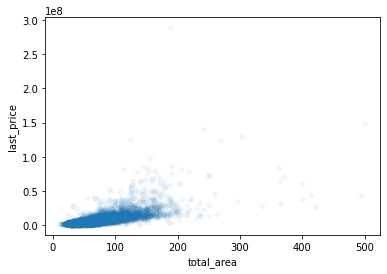

In [99]:
# построим график зависимомти цены от площади желья
print(df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05))

#проверим коррелцию
df['total_area'].corr(df['last_price'])


**Корреляция заметна. действительно чем больше кваритра, тем она дороже. Но цена на квартиру вряд ли зависит исключительно от размера площади. Изучим остальные столбцы**


**Далее зависимость цены от жилой площади**

AxesSubplot(0.125,0.125;0.775x0.755)


0.5196232692262193

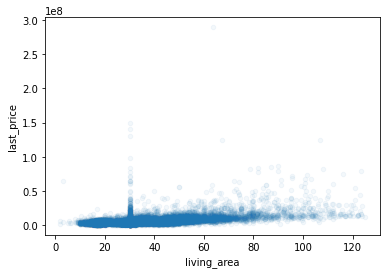

In [100]:
# построим график зависимомти цены от жилой площади 
print(df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05))

#проверим коррелцию
df['living_area'].corr(df['last_price'])

**Зависимость от жилой площади уже не очень заметна. Общая площадь квартиры важнее**

**Далее рассмотрим зависимость цены от площади кухни**

AxesSubplot(0.125,0.125;0.775x0.755)


0.43977110577942624

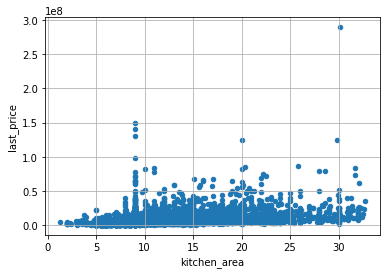

In [101]:
# построим график зависимомти цены от жилой площади 
print(df.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True))

#проверим коррелцию
df['kitchen_area'].corr(df['last_price'])

**Зависимость есть, но cлабая**

**От площади кухни цена не зависит сильно.**

**Следующая категория количество комнат**

**Проверка зависимости цены на квартиру от количества комнат**

<AxesSubplot:xlabel='rooms'>

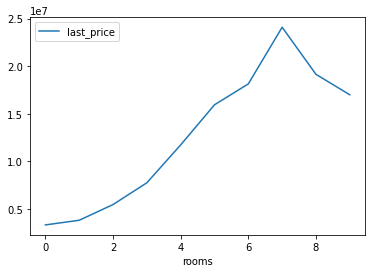

In [102]:
# построим график зависимости цены от количества комнат в квартире
df.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot()

**Очевидна зависимость от количества конмнат. Пик приходится на 7 комнат**

**Далее зависиомть от высоты эатажа**

<AxesSubplot:xlabel='floor_type'>

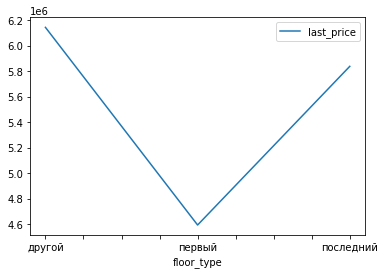

In [103]:
# построим график зависимости цены от типа высоты этажа
df.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot()

**Из графика можно сделать вывод, что больше ценятся этажи между первым и последним. Последний этаж ценится выше всего.**

<AxesSubplot:xlabel='day_exposition'>

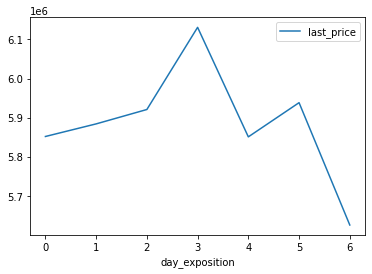

In [104]:
# построим график зависимости цены от дня недели публикации объявления
df.pivot_table(index='day_exposition', values='last_price', aggfunc='mean').plot()

**Наибольшую цену демонстрируют квартиры, выставленные на продажу в будние дни и наименьшую в выходные.**

**Максимум приходитс на четверг. Минимум на воскресенье**

**Далее проверяем зависимость от месяца объявления**

<AxesSubplot:xlabel='month_exposition'>

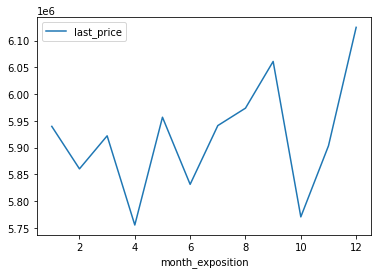

In [105]:
# построим график зависимости цены от месяца публикации объявления
df.pivot_table(index='month_exposition', values='last_price', aggfunc='mean').plot()

**Самые высокие цены с агуста по январь с локальным снижением в окрябре и максимумом в декабре-январе. С февараля по июль цены ниже, с минимальной ценой в июне.**

**Возможно влияет желание въехать в новое жилье перед "Новым годом" и сезоном отпусков, а следовательно снижением покупательской активности - летом.**

**Дальше проверим год публикации**

<AxesSubplot:xlabel='year_exposition'>

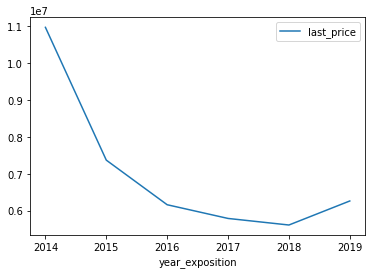

In [106]:
# построим график зависимомти цены от года публикации объявения
df.pivot_table(index='year_exposition', values='last_price', aggfunc='mean').plot()

**Наблюдается явное снижение стоимости жилья после 2014 года вплото до 2018, в 2018 снова рост стоимости жилья**

**В итоге выяснили, что стоимость жилья больше всего зависит от общей площади жилья и количества комнат. Имеет значение высота этажа, меньше хотят селиться на первом этаже. Меньше зависимость цены от жилой площади и площади кухни, ещё меньше.**

**Наблюдается зависимость стоимости от даты публикации. Дороже квартиры, которые выставлены в будни, в осеннии и зимние месяцы. Стоимость квартир снижалась после 2014 года и начала расти с 2018г.

**Далее посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [107]:
# выводим первые 10 населённых пунктов по цене за квадратный метр
df.pivot_table(index='locality_name', values='price_per_metre', aggfunc='mean').round(decimals=2).sort_values(by='price_per_metre',ascending=False).head(10)

,price_per_metre
locality_name,
Лисий Нос,113728.35
Санкт-Петербург,112638.16
Кронштадт,111470.59
Пушкин,102675.94
Сестрорецк,101853.43
Мистолово,98549.98
Левашово,96997.69
Кудрово,95312.85
Парголово,90103.14


**Максимальная средняя стоимость за квадратный метр в Лисий Нос, квартиры в Санкт-Петербурге на втором месте**

AxesSubplot(0.125,0.125;0.775x0.755)


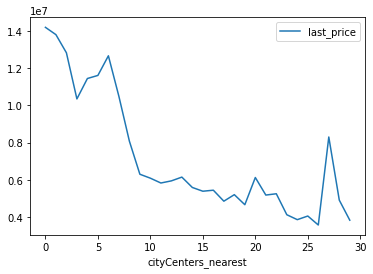

In [108]:
print(df.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot())


**Заметно что чем ближе к центру города, тем выше цена за квадтраный метр**

### Общий вывод

**Большая часть квартир продаётся в Санкт-Петербурге. Самый дорогой метр также Санкт-Петербурге, замыкает 10ку лидтеров - Колпино.  Цена на жильё больше всего зависит от расстрояния до центра и площади квартры, колчиества комнат. Меньше зависимость от высоты этажа, но предпочитают не первый. Площадь кухни и доля жилой площади влияют на цену не так сильно как общая площадь.**

**Есть зависимость от времени публикации объвления. Если хотите продать квартиру подороже, то публикуйте в будни, в конце осени или декабре. С 2014 года по 2017 наблюдался спад** 

**Почти половина квартир продаётся в домах до 12и этажей. и до 3х комнат. Около четверти всех квартир имеют высоты потолков 2,50. Половина объявления в домах до 12ти этажей, включая пятиэтажки. Срденяя площадь около 30-35 квадратных метров. Большинство сделок проходит до 17,5 млн. руб. Жилая площадь в основном до 50м2, Кухни до 10м2. Балконов в основном 1 и 2 поровну, примерно в два раза меньше квартир без балконов. Большинство домов находится на расстоянии от 10 до 39км от аэропорта. Большая часть кваритр находится в пределах 17ти километров от центра города/населённого пункта. Водоёмы в основном на расстоянии до 1,5 км от квартиры, а паркт до 700 метров. Большинство объявления публикуются в будние дни и с сентября по апрель. Квартир продаётс в осноном до 100дней.**

**В этом проекте остались не исследованы столбцы is_apartment — апартаменты, open_plan — свободная планировка, studio — квартира-студия. Интересно было бы рассмотреть

